<h2>Computational Physics Project 1</h2>

Lars Schuster           05.10.2022

A particle is falling from a certain heigth. The gravitational Force and the fricitonal Force are acting on it. Together they result in a differential equation. It can be solved to describe the positon of the particle namely its y-Coordinate as a function of time. 
To simulate the fall the Euler schema will be used. This algorithm approximates the trajectory of the particle by using taylor expansion for very small time differences.

In [51]:
import numpy as np
#global constants
R_earth = 6370 * 10**3 #m
M_earth = 5.99 * 10**24  # kg
G = 6.67 * 10**(-11) #m^3 /(kgs^2)
g = 9.81 #m/s^2

def grav1(M_particle, y):
    return (-G*((M_earth*M_particle)/(R_earth + y)**2))

def grav2(M_particle, y):
    return (-M_particle*g)

def fric1(k,v):
    return k*v

def fric2(k,v):
    return k*v**2


a)The implementation of the euler algorithm is through a function. The function takes a function Gravity with which it will compute the gravitational force on the particle. The Friction parameter is also a function which will compute the frictional Force on the particle.
The parameters y and v_initial are the inital height from the surface of earth and the inital velocity in upwards direction.
The rest of the parameters are k: the frictional coefficient, m: the mass of the particle and dt: the timeinterval.

The function will return a list of three arrays. The first contains the times, the second holds the heights and the last one the velocities.

In [52]:
#Gravity is a function
def euler(Gravity, y, Friction , k , v_inital, dt ,m):
    h = y
    v = v_inital
    a = 0
    t = 0
    heights = [h]
    velocities = [v]
    times = [t]
    
    i = 0
    while h > 0:
        F_tot = Gravity(m, heights[i]) + Friction(k,velocities[i])
        a = F_tot / m
        v = v + a*dt
        h = h + v*dt
        t = t + dt

        heights.append(h)
        times.append(t)
        velocities.append(v)
        i = i + 1

    return [times,heights,velocities]
#euler schema

The results of the euler schema were plotted for the inital conditions given in the problem.

241.25


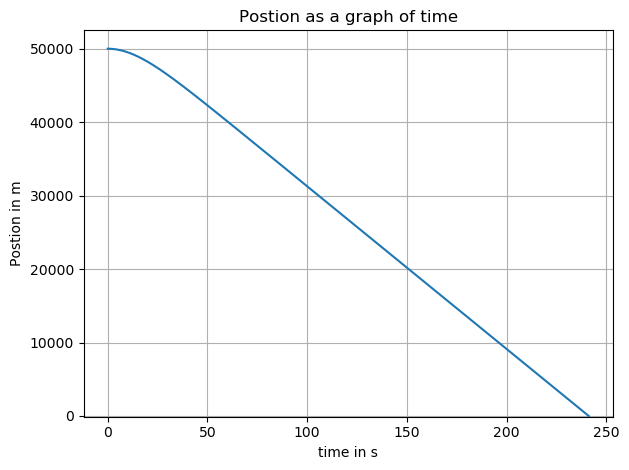

In [53]:
from matplotlib import pyplot as plt

ret_e = euler(grav2, 50000, fric2, 2*10**(-4), 0, 0.25, 1)

pos = np.array(ret_e[1])
tim = np.array(ret_e[0])
vel = np.array(ret_e[2])

def plot(x,y):
    plt.title("Postion as a graph of time")
    plt.xlabel('time in s')
    plt.ylabel('Postion in m')
    plt.plot(x, y)
    plt.ylim(-100, max(y)*1.05)
    plt.grid()
    plt.tight_layout()


plot(tim,pos)
print(tim[len(tim)-1])

The paritcle reaches the ground (height = 0) after about 241.25 seconds

To find the right time interval to which the graph converges the time interval is halved until almost no difference can be found between the graphs of the two datasets.
For this the case of no friction and no inital velocity is taken into account.

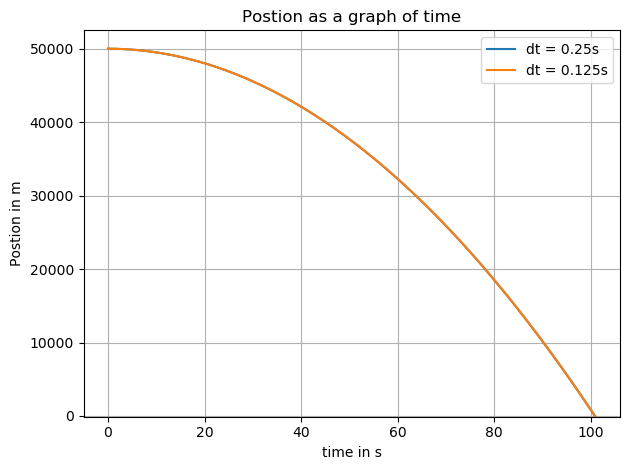

In [54]:
def plot2(x1,y1,x2,y2,label1,label2):
    plt.title("Postion as a graph of time")
    plt.xlabel('time in s')
    plt.ylabel('Postion in m')
    plt.plot(x1, y1, label=label1)
    plt.plot(x2, y2, label=label2)
    plt.ylim(-100, max(y1)*1.05)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
ret1 = euler(grav2, 50000 ,fric2 , 0 ,0 , 0.25 , 1)
ret2 = euler(grav2, 50000 ,fric2 , 0 ,0 , 0.125 , 1)

tim1 = np.array(ret1[0])
pos1 = np.array(ret1[1])
tim2 = np.array(ret2[0])
pos2 = np.array(ret2[1])

plot2(tim1,pos1,tim2,pos2,"dt = 0.25s","dt = 0.125s")

The ideal time-step seems to be 0.25 seconds for the graphs to be identical.(Blue line is covered by the orange one entirely)

b)To verify the algorithm the terminal velocity for the case of frictional force is proportional to velocity squared is calculated and plotted against the actual velocity from the algorithm:

v<sub>terminal</sub> = -$\sqrt{\frac{mg}{k}}$ (1)

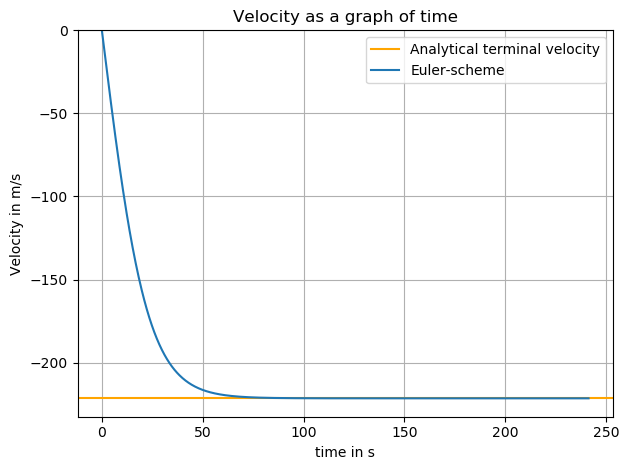

In [55]:
from math import sqrt

def vterm(m,k):
    return float(-sqrt((m*9.81)/k))


plt.title("Velocity as a graph of time")
plt.xlabel('time in s')
plt.ylabel('Velocity in m/s')
plt.axhline(vterm(1, 2*10**(-4)), label="Analytical terminal velocity",c = "orange")
plt.plot(tim, vel, label="Euler-scheme")
plt.legend()
plt.ylim(min(vel)*1.05, max(vel)*1.05)
plt.grid()
plt.tight_layout()


The velocity approaches the terminal velocity asymptotically.
 
To test the implementation of the Euler algorithm the case of a constant acceleration and no air resistance is modeled and compared with the classical solution of 

y = y<sub>0</sub> + v<sub>0</sub>⋅t + (1/2)⋅a<sub>0</sub>⋅t<sup>2</sup> (2)

the solutions are plotted against one another. To help visibility the line of the analytical solution is slightly larger.

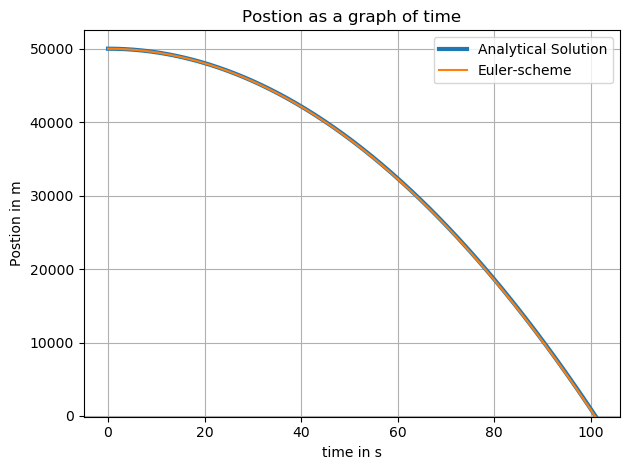

In [56]:
ret_e = euler(grav2, 50000, fric2, 0, 0, 0.25, 1)

pos = np.array(ret_e[1])
tim = np.array(ret_e[0])

def y(x, y_0, v_0 , a_0):
    return (y_0 + v_0*x + 0.5* a_0 * x**2)

plt.title("Postion as a graph of time")
plt.xlabel('time in s')
plt.ylabel('Postion in m')
plt.plot(tim, y(tim, 50000, 0, -9.81), label="Analytical Solution", linewidth=3)
plt.plot(tim, pos,label="Euler-scheme")
plt.legend()
plt.ylim(-100, max(pos)*1.05)
plt.grid()
plt.tight_layout()

The model agrees with the expected trajectory of the particle.

c) The simplified version of the Euler-Richardson-Algorithm is only set for a constant acceleration. By shifting the first value of the velocity list so that it is at v<sub>mid</sub> makes us able to reduce complexity and cost.

The function "eulerrich" takes the arguments y: inital height, v_initial: initial velocity, a_inital: initial velocity and dt: time interval.

In [57]:
def eulerrich(y,v_inital,a_initial,dt):
    a = a_initial
    h = y
    v = v_inital+0.5*a*dt
    t = 0

    times = [t]
    heights = [h]
    
    while h > 0:
        h = h + v*dt
        v = v + a*dt
        t = t +dt

        heights.append(h)
        times.append(t)
    
    return [times,heights]

To find the right time interval for this the same procedure is used as for the Euler-scheme.

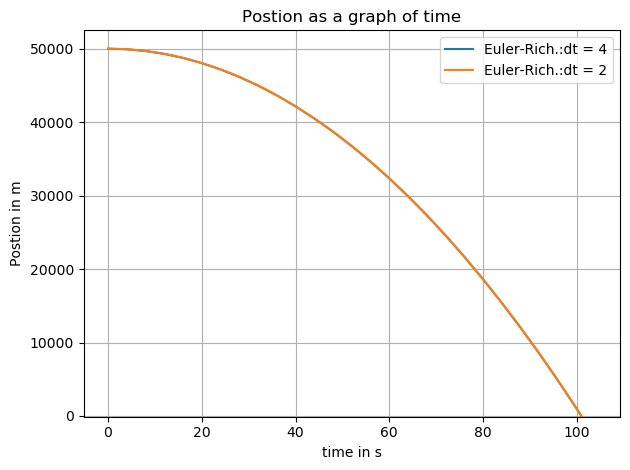

In [58]:
ret_er1 = eulerrich(50000, 0, -9.81, 4)
ret_er2 = eulerrich(50000, 0, -9.81, 2)

ertim1 = np.array(ret_er1[0])
erpos1 = np.array(ret_er1[1])
ertim2 = np.array(ret_er2[0])
erpos2 = np.array(ret_er2[1])

plot2(ertim1,erpos1,ertim2,erpos2,"Euler-Rich.:dt = 4","Euler-Rich.:dt = 2")

To verify the code the algorithm was again compared against the analytical solution. (2)

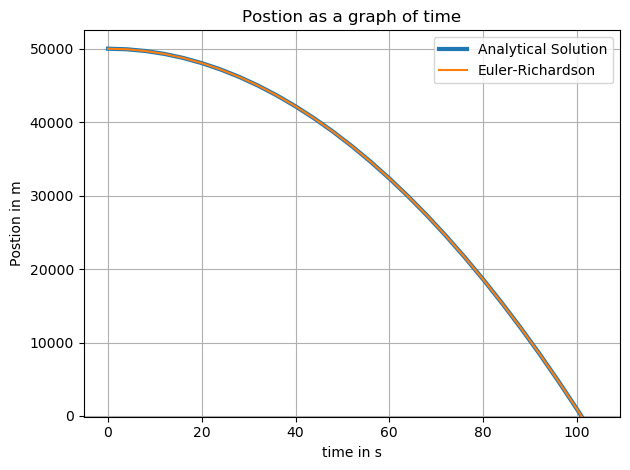

In [59]:
ret_er = eulerrich(50000,0,-9.81,4)

er_times = np.array(ret_er[0])
er_pos = np.array(ret_er[1])

plt.title("Postion as a graph of time")
plt.xlabel('time in s')
plt.ylabel('Postion in m')
plt.plot(er_times, y(er_times, 50000, 0, -9.81),
         label="Analytical Solution", linewidth=3)
plt.plot(er_times, er_pos, label="Euler-Richardson")
plt.legend()
plt.ylim(-100, max(pos)*1.05)
plt.grid()
plt.tight_layout()


Comparing the two algorithms it is clear that the time interval for the Euler-Richardson algorthim can be kept much larger than for the Euler Schema. The numerical cost is therefore smaller in case of a constant acceleration.